In [36]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\Pablo\AppData\Local\Temp\ipykernel_24796\2026922495.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


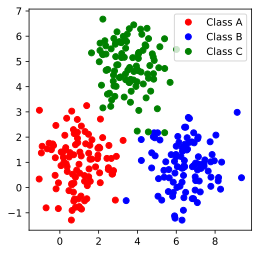

In [37]:
# create data
points_per_cluster = 100
blur = 1.0 # increase this value to make the clusters more blurry

A = [1, 1] # center of the first cluster
B = [6.5, 1] # center of the second cluster
C = [3.5, 5] # center of the third cluster

# generate data
np.random.seed(7) # for reproducibility
data_A = np.random.randn(points_per_cluster, 2) * blur + A
data_B = np.random.randn(points_per_cluster, 2) * blur + B
data_C = np.random.randn(points_per_cluster, 2) * blur + C
data = np.concatenate([data_A, data_B, data_C])

# true labels
labels_A = np.zeros(points_per_cluster) # class 0
labels_B = np.ones(points_per_cluster) # class 1
labels_C = np.full(points_per_cluster, 2) # class 2
labels = np.concatenate([labels_A, labels_B, labels_C])

# convert to PyTorch tensors
data = torch.tensor(data, dtype=torch.float32)
labels = torch.tensor(labels, dtype=torch.float32)

# visualize data
fig = plt.figure(figsize=(4, 4))
plt.plot(data_A[:, 0], data_A[:, 1], 'ro', label='Class A')
plt.plot(data_B[:, 0], data_B[:, 1], 'bo', label='Class B')
plt.plot(data_C[:, 0], data_C[:, 1], 'go', label='Class C')
plt.legend()
plt.show()

In [ ]:
def create_model(learning_rate=0.01):

    # model architecture
    model = nn.Sequential(
        nn.Linear(2, 4), 
        nn.ReLU(),       
        nn.Linear(4, 3)
        # nn.Softmax(dim=1) # not needed since we will use CrossEntropyLoss which applies softmax internally
    )

    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    return model, loss_fn, optimizer

def train(model, loss_fn, optimizer, data, labels, epochs=100):

    losses = torch.zeros(epochs)
    accuracies = torch.zeros(epochs)

    for epoch in range(epochs):
        
        # forward pass
        y_pred_logits = model(data)
        

        # comput loss
        loss = loss_fn(y_pred_logits, labels.long()) # convert labels to long for CrossEntropyLoss
        losses[epoch] = loss.item()

        # compute accuracy
        y_pred = torch.argmax(y_pred_logits, dim=1)
        accuracy = (y_pred == labels).float().mean()
        accuracies[epoch] = accuracy.item()

        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return losses, accuracies

In [42]:
num_epochs = 1000
learning_rate = 0.05

model, loss_fn, optimizer = create_model(learning_rate)
losses, accuracies = train(model, loss_fn, optimizer, data, labels, epochs=num_epochs)

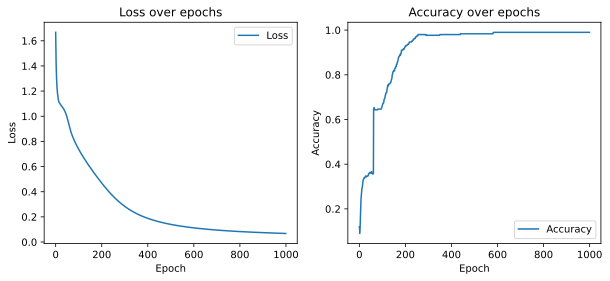

In [43]:
# plot loss and accuracy
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(losses.numpy(), label='Loss')
ax[0].set_title('Loss over epochs')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(accuracies.numpy(), label='Accuracy')
ax[1].set_title('Accuracy over epochs')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.show()

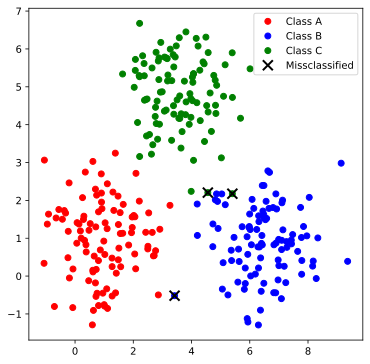

In [44]:
# plot final results
y_pred_logits = model(data)
y_pred = torch.argmax(y_pred_logits, dim=1)
missclassified = (y_pred != labels).numpy()

fig = plt.figure(figsize=(6, 6))
plt.plot(data_A[:, 0], data_A[:, 1], 'ro', label='Class A')
plt.plot(data_B[:, 0], data_B[:, 1], 'bo', label='Class B')
plt.plot(data_C[:, 0], data_C[:, 1], 'go', label='Class C')
plt.plot(data[missclassified, 0], data[missclassified, 1], 'kx', label='Missclassified', markersize=10, markeredgewidth=2)
plt.legend()